In [32]:
def loadAndFormatData(filename):
    data = pd.read_csv(filename, sep=", ", header=None)
    data.columns = ["x1", "x2", "x3", "x4","x5","x6","x7","x8","x9","x10","x11","x12"]
    data.drop(["x3", "x9"], axis=1, inplace=True)
    print(data.shape)
    return data


import pandas as pd
import numpy as np




dataLeft = loadAndFormatData('sonarLogL.txt')
# print(dataLeft.head())
dataLeft1 = loadAndFormatData('sonarLogL1.txt')
dataLeft2 = loadAndFormatData('sonarLogL2.txt')
dataRight = loadAndFormatData('sonarLogR.txt')
dataRight1 = loadAndFormatData('sonarLogR1.txt')
dataRight2 = loadAndFormatData('sonarLogR2.txt')
dataMid = loadAndFormatData('sonarLogM.txt')
dataMid1 = loadAndFormatData('sonarLogM1.txt')
dataMid2 = loadAndFormatData('sonarLogM2.txt')

dataLeft = pd.concat([dataLeft, dataLeft1, dataLeft2], axis=0)
dataRight = pd.concat([dataRight, dataRight1, dataRight2], axis=0)
dataMid = pd.concat([dataMid, dataMid1, dataMid2], axis=0)



C:\ProgramData\Miniconda2\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


(2400, 10)
(2300, 10)
(2500, 10)
(2380, 10)
(2480, 10)
(2480, 10)
(2420, 10)
(2480, 10)
(2440, 10)


In [35]:
# frequency ~~ 50Hz
# dataLeftMost.info()

def removeOutliers(dataFrame):
    print("before removal: ", dataFrame.shape)
    d_mean = dataFrame.mean()
    d_std = dataFrame.std()
    # dataFrame.describe()
    outlier_index = []
    for column in dataFrame:
    #     print(dataFrame[column])
        for ind, val in enumerate(dataFrame[column]):
    #         print(i, j)
            if val > (d_mean[column] + 3*d_std[column]) or val < (d_mean[column] - 3*d_std[column]):
                outlier_index.append(ind)

    outlier_index = list(set(outlier_index))
#     print(outlier_index, len(outlier_index))
    result = dataFrame.drop(dataFrame.index[outlier_index])
    result.reset_index(drop=True, inplace=True)
    print("after removal: ", result.shape)
    return result


dataLeft = removeOutliers(dataLeft)
dataRight = removeOutliers(dataRight)
dataMid = removeOutliers(dataMid)


('before removal: ', (7192, 10))
('after removal: ', (6817, 10))
('before removal: ', (7332, 10))
('after removal: ', (6639, 10))
('before removal: ', (7332, 10))
('after removal: ', (7296, 10))


In [34]:
def movingAvg(dataSet, winSize=5):
#     print(dataSet.head(20))    
    ma_data = dataSet.copy()
    for ind, col in enumerate(dataSet):
        ma_data[col] = dataSet[col].rolling(window=winSize).mean()

#     print(ma_data.head(20), ma_data.shape)
    ma_data.dropna(inplace=True)
    ma_data.reset_index(drop=True, inplace=True)
#     print(ma_data.head(10), ma_data.shape)    
    return ma_data


# col_names =  ['MA1', 'MA2', 'MA3', 'MA4', 'MA5', 'MA6']
dataLeft = movingAvg(dataLeft, winSize = 5)
dataRight = movingAvg(dataRight, winSize = 5)
dataMid = movingAvg(dataMid, winSize = 5)



In [40]:
def featureExtaction(df):
    result, header = [], []
    
    
    for i in range(df.shape[0]):
        temp = []
        for j in range(len(df.iloc[i])-1):
            for k in range(j+1, len(df.iloc[i])):
                temp.append(df.iloc[i, j] / df.iloc[i, k])
        result.append(temp)    
    
    print(len(result), len(temp), len(header), len(df.iloc[i]))
    
    for ind in range(len(temp)):
        header.append("x{}".format(1+ind))
    
    return pd.DataFrame(result, columns=header)


dataLeft = featureExtaction(dataLeft)
dataRight = featureExtaction(dataRight)
dataMid = featureExtaction(dataMid)


(6817, 45, 0, 10)
(6639, 45, 0, 10)
(7296, 45, 0, 10)


In [41]:
dataLeft.info()
dataLeft.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6817 entries, 0 to 6816
Data columns (total 45 columns):
x1     6817 non-null float64
x2     6817 non-null float64
x3     6817 non-null float64
x4     6817 non-null float64
x5     6817 non-null float64
x6     6817 non-null float64
x7     6817 non-null float64
x8     6817 non-null float64
x9     6817 non-null float64
x10    6817 non-null float64
x11    6817 non-null float64
x12    6817 non-null float64
x13    6817 non-null float64
x14    6817 non-null float64
x15    6817 non-null float64
x16    6817 non-null float64
x17    6817 non-null float64
x18    6817 non-null float64
x19    6817 non-null float64
x20    6817 non-null float64
x21    6817 non-null float64
x22    6817 non-null float64
x23    6817 non-null float64
x24    6817 non-null float64
x25    6817 non-null float64
x26    6817 non-null float64
x27    6817 non-null float64
x28    6817 non-null float64
x29    6817 non-null float64
x30    6817 non-null float64
x31    6817 non-null fl

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45
count,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,...,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000
mean,2.267618,0.623401,0.354212,0.567067,0.993333,1.542695,0.618627,0.349902,0.558227,0.374649,...,1.553311,0.623266,0.354625,0.562373,0.466713,0.248428,0.417841,0.549598,0.905387,2.480855
std,1.152308,0.098397,0.264776,0.087844,0.049991,0.597703,0.060120,0.259128,0.047264,0.287291,...,0.596763,0.056823,0.263427,0.043042,0.195402,0.206383,0.171385,0.376347,0.064071,1.259190
min,0.186695,0.261762,0.097817,0.247788,0.398798,0.369752,0.277744,0.105821,0.244452,0.077185,...,0.473360,0.510193,0.123638,0.481169,0.183517,0.068930,0.189007,0.203761,0.718735,0.677287
25%,1.503716,0.596136,0.143912,0.511141,0.991016,1.109033,0.595487,0.142701,0.526097,0.220366,...,1.112048,0.598189,0.142166,0.529490,0.323293,0.102693,0.304002,0.235866,0.856062,0.879920
50%,2.090863,0.603588,0.185306,0.575861,1.000972,1.446453,0.605265,0.197024,0.553300,0.298144,...,1.461635,0.605194,0.196458,0.557921,0.430341,0.137045,0.373521,0.335657,0.901021,2.840818
75%,2.828495,0.609940,0.616442,0.598288,1.006990,1.896375,0.615264,0.656019,0.589333,0.410024,...,1.900015,0.625152,0.679713,0.594677,0.565643,0.343754,0.489717,1.025473,0.964277,3.617697
max,8.357340,1.369084,1.282771,1.283341,1.447395,3.720886,1.188313,1.271471,0.886010,3.230632,...,3.336543,0.898783,1.136077,0.819443,1.268754,1.130878,1.257712,1.266242,1.059510,4.312561


In [42]:
def labelAndCombineData(df_list):
    data_list = []
    label_list = []
    for ind, df in enumerate(df_list):
        temp = df.copy()
        label = pd.Series(ind, index=df.index, dtype=int)
        data_list.append(temp)
        label_list.append(label)
    
    return pd.concat(data_list, axis=0), pd.concat(label_list, axis=0)

# com_data, com_label = labelAndCombineData([pd.concat([dataLeftMostMA, dataLeftMA], axis=0), pd.concat([dataRightMostMA, dataRightMA], axis=0), dataMid])
com_data, com_label = labelAndCombineData([dataLeft, dataRight, dataMid])

# print(com_data, com_label)

 

In [43]:
# feature normalization
def normalizeTrainDF(dataFrame, mode="std"):
    result = dataFrame.copy()    
    params = pd.DataFrame(index=range(len(dataFrame.columns)),columns = ["std", "mean", "min", "max"])
    
    for ind, feature_name in enumerate(dataFrame.columns):
        std_value = dataFrame[feature_name].std()
        mean_value = dataFrame[feature_name].mean()
        max_value = dataFrame[feature_name].max()
        min_value = dataFrame[feature_name].min()
        params.iloc[ind] = [std_value, mean_value, max_value, min_value]        
        if mode == "std":
            result[feature_name] = ((dataFrame[feature_name] - mean_value) / std_value) if std_value else 0
        elif mode == "mean":
            result[feature_name] = ((dataFrame[feature_name] - mean_value) / (max_value - mean_value)) if (max_value - mean_value) else 0
        else:
            result[feature_name] = ((dataFrame[feature_name] - min_value) / (max_value - min_value)) if (max_value - min_value) else 0

    return result, params
        
norm_data, params = normalizeTrainDF(com_data)
print(norm_data.head(), params["std"][0])


def normalizeTestDF(dataFrame, params, mode="std"):
    result = dataFrame.copy()    
    
    for ind, feature_name in enumerate(dataFrame.columns):  
        print(ind, feature_name, dataFrame[feature_name].dtype,  params["mean"][ind].dtype)
        if mode == "std":
            result[feature_name] = ((dataFrame[feature_name] - params["mean"][ind]) / params["std"][ind]) if params["std"][ind] else 0
        elif mode == "mean":
            result[feature_name] = ((dataFrame[feature_name] - params["mean"][ind]) / (params["max"][ind] - params["mean"][ind])) if (params["max"][ind] - params["mean"][ind]) else 0
        else:
            result[feature_name] = ((dataFrame[feature_name] - params["min"][ind]) / (params["max"][ind] - params["min"][ind])) if (params["max"][ind] - params["min"][ind]) else 0

    return result
    


(         x1        x2        x3        x4        x5        x6        x7  \
0 -0.068887 -0.181855 -0.715466 -0.317101  0.002180  0.558386 -0.305030   
1 -0.092379 -0.180713 -0.715413 -0.316693  0.003428  0.555151 -0.301885   
2 -0.102655 -0.176556 -0.714701 -0.313464  0.012784  0.558355 -0.293536   
3 -0.082293 -0.173971 -0.714220 -0.311225  0.019197  0.559635 -0.287022   
4 -0.027012 -0.172388 -0.713775 -0.309138  0.025110  0.561696 -0.280808   

         x8        x9       x10    ...          x36       x37       x38  \
0 -0.715743 -0.440515 -0.390354    ...     0.645855 -0.440306 -0.794792   
1 -0.715963 -0.438439 -0.373666    ...     0.640872 -0.437067 -0.795186   
2 -0.715241 -0.433018 -0.363521    ...     0.635670 -0.433765 -0.795564   
3 -0.714847 -0.428776 -0.375789    ...     0.631057 -0.430433 -0.795931   
4 -0.714502 -0.424719 -0.410758    ...     0.627846 -0.427090 -0.796286   

        x39       x40       x41       x42       x43       x44       x45  
0 -0.557169 -1.075485 -

In [44]:
# dimension reduction
from sklearn.decomposition import PCA 
pca=PCA(n_components=3, copy=True, whiten=False)
reduced_data = pca.fit_transform(norm_data)
print(pca.components_, pca.n_components_, pca.explained_variance_ratio_, pca.mean_, pca.noise_variance_)




(array([[-0.06574205,  0.10040541,  0.19774914,  0.16429854,  0.00657293,
        -0.04717907,  0.07350184,  0.20312106,  0.16093295,  0.12315622,
         0.20580613,  0.18418064,  0.04305658,  0.03562051,  0.12684249,
         0.22271674,  0.19846592,  0.16203803,  0.12311548, -0.05232723,
        -0.09350287, -0.01335804,  0.16162029,  0.11290728, -0.15759466,
        -0.19028503, -0.19260545, -0.19238518, -0.04488741, -0.17794022,
        -0.14945903, -0.15661341, -0.13479767,  0.11556427, -0.03452372,
        -0.0584881 ,  0.09287153,  0.21652903,  0.18824765,  0.12461211,
         0.22451733,  0.20251559,  0.20333985,  0.17429936, -0.17781733],
       [-0.30985397, -0.07858765, -0.09981648, -0.09793229, -0.10081284,
        -0.337839  , -0.18313325, -0.13781121, -0.15853057,  0.1553295 ,
         0.05348213,  0.13158988,  0.32958285,  0.10599933,  0.2355306 ,
         0.05662165,  0.16280801, -0.06839684, -0.02868831,  0.11675201,
        -0.23853087, -0.05427042, -0.07979082, -0

<IPython.core.display.Javascript object>


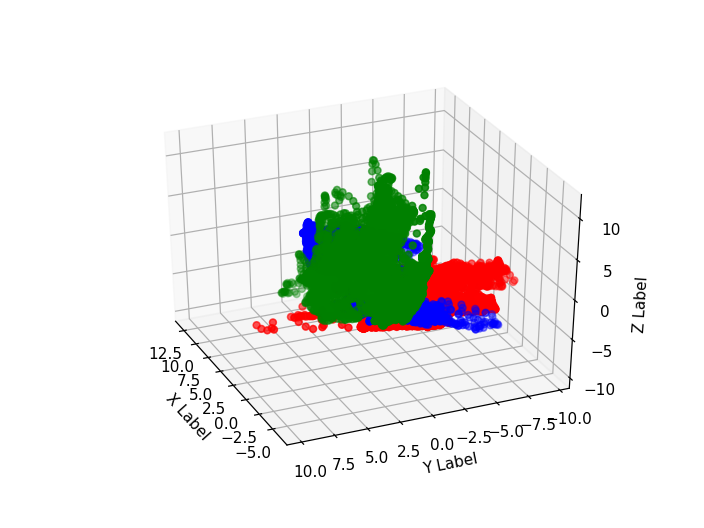

In [45]:
%matplotlib notebook
import matplotlib.pyplot as plt
import ipympl
from mpl_toolkits.mplot3d import Axes3D




fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reduced_data[com_label==0, 0], reduced_data[com_label==0, 1], reduced_data[com_label==0, 2:], c='r', marker='o')
ax.scatter(reduced_data[com_label==1, 0], reduced_data[com_label==1, 1], reduced_data[com_label==1, 2:], c='b', marker='o')
ax.scatter(reduced_data[com_label==2, 0], reduced_data[com_label==2, 1], reduced_data[com_label==2, 2:], c='g', marker='o')
# ax.scatter(reduced_data[com_label==3, 0], reduced_data[com_label==3, 1], reduced_data[com_label==3, 2:], c='c', marker='o')
# ax.scatter(reduced_data[com_label==4, 0], reduced_data[com_label==4, 1], reduced_data[com_label==4, 2:], c='m', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [46]:
from sklearn import linear_model
from sklearn import metrics, cross_validation

logreg = linear_model.LogisticRegression(C=1e-1)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(norm_data, com_label)


predicted = cross_validation.cross_val_predict(logreg, norm_data, com_label, cv=40)
print metrics.accuracy_score(com_label, predicted)
print metrics.classification_report(com_label, predicted) 


0.94468003084
             precision    recall  f1-score   support

          0       0.98      0.96      0.97      6817
          1       0.95      0.93      0.94      6639
          2       0.92      0.94      0.93      7296

avg / total       0.95      0.94      0.94     20752



In [11]:
def makePredction():
    data = loadAndFormatData('sonarLog.txt')    
    dataMA = movingAvg(data,  winSize = 5)
    dataNorm = normalizeTestDF(dataMA, params)
    with open("prediction.txt", "a") as myfile:
        for i in range(dataNorm.shape[0]):
            current = dataNorm.iloc[i].values.reshape(1, -1)
#             print(current, str(logreg.predict(current)[0]))
            myfile.write(str(logreg.predict(current)[0]))
    
# makePredction()

In [12]:
def segmentData(df, winSize=5): # offset ???
    temp_list = []
    col_names = []
    for i in range(len(df.columns)*winSize):
        col_names.append("x{}".format(i))
        
    for i in range(0, df.shape[0]-winSize, winSize):
        temp = pd.DataFrame(df.iloc[i:i+winSize, :].values.reshape(1, len(df.columns)*winSize), range(1), columns=col_names)
        
        temp_list.append(temp)
    
    
    result = pd.concat(temp_list, axis=0)
    result = result.reset_index(drop=True)
    print(result.head())
    return result
    
# segLM_MA = segmentData(dataLeftMostMA)
segL_MA = segmentData(dataLeftMA)
# segRM_MA = segmentData(dataRightMostMA)
segR_MA = segmentData(dataRightMA)
segM_MA = segmentData(dataMidMA)



NameError: name 'dataLeftMA' is not defined

In [ ]:
com_seg_data, com_seg_label = labelAndCombineData([segL_MA, segR_MA, segM_MA])
# print(com_seg_data, com_seg_label)

norm_seg_data, params = normalizeTrainDF(com_seg_data)
print(norm_seg_data.head())

pca=PCA(n_components=3, copy=True, whiten=False)
reduced_seg_data = pca.fit_transform(norm_seg_data)



In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reduced_seg_data[com_seg_label==0, 0], reduced_seg_data[com_seg_label==0, 1], reduced_seg_data[com_seg_label==0, 2:], c='r', marker='o')
ax.scatter(reduced_seg_data[com_seg_label==1, 0], reduced_seg_data[com_seg_label==1, 1], reduced_seg_data[com_seg_label==1, 2:], c='b', marker='o')
ax.scatter(reduced_seg_data[com_seg_label==2, 0], reduced_seg_data[com_seg_label==2, 1], reduced_seg_data[com_seg_label==2, 2:], c='g', marker='o')
# ax.scatter(reduced_seg_data[com_seg_label==3, 0], reduced_seg_data[com_seg_label==3, 1], reduced_seg_data[com_seg_label==3, 2:], c='c', marker='o')
# ax.scatter(reduced_seg_data[com_seg_label==4, 0], reduced_seg_data[com_seg_label==4, 1], reduced_seg_data[com_seg_label==4, 2:], c='m', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
logreg = linear_model.LogisticRegression(C=10)

pca=PCA(n_components=5, copy=True, whiten=False)
reduced_seg_data = pca.fit_transform(norm_seg_data)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(reduced_seg_data, com_seg_label)


predicted = cross_validation.cross_val_predict(logreg, reduced_seg_data, com_seg_label, cv=10)
print metrics.accuracy_score(com_seg_label, predicted)
print metrics.classification_report(com_seg_label, predicted) 